In [1]:
%matplotlib notebook

import numpy as np
import numpy.random as rnd

import cvxpy as cvx

import matplotlib.pyplot as plt

# 1. Unconstrained Optimization

In this question you will complete an implementation of Newton's method for solving the following unconstrained convex optimization problem,

$$
    \text{minimize} \quad f(x) \triangleq - \sum_{i=1}^{n} \log (2 - x_i^2) - \sum_{i=1}^{m} \log (b_i - a_i^T x)
$$

Data for the problem is generated randomly as

$$
    A = \begin{bmatrix} a_1^T \\ a_2^T \\ \vdots \\ a_m^T \end{bmatrix} \in \mathbb{R}^{m \times n}
    \quad \text{and} \quad
    b \in \mathbb{R}_{++}^{m}
$$

Since $b \succ 0$ we know that $x = 0$ is a feasible point for initialising our optimization algorithm.

In [2]:
# generate a problem instance
rnd.seed(4680)

m = 1000
n = 100
A = rnd.randn(m, n)
b = rnd.rand(m, 1)

## (a) Derive an expression for the gradient $g = \nabla f(x)$


$$
     \quad f(x) \triangleq - \sum_{i=1}^{n} \log (2 - x_i^2) - \sum_{i=1}^{m} \log (b_i - a_i^T x) \\
     g = \nabla f(x) \\
     g = \frac{\partial f}{\partial x}(- \sum_{i=1}^{n} \log (2 - x_i^2) - \sum_{i=1}^{m} \log (b_i - a_i^T x)) \\
     g = -\sum_{i=1}^{n} \frac{\partial f}{\partial x} (\log (2 - x_i^2)) - \sum_{i=1}^{m} \frac{\partial f}{\partial x} (\log (b_i - a_i^T x)) \\
     g = -\sum_{i=1}^{n} \frac{1}{2 - x_i^2} \frac{\partial f}{\partial x} (2 - x_i^2) - \sum_{i=1}^{m} \frac{1}{(b_i - a_i^T x)}\frac{\partial f}{\partial x} (b_i - a_i^T x) \ \ \ by \ chain \ rule\\    
     g = -\sum_{i=1}^{n} \frac{-2x_i}{2 - x_i^2} - \sum_{i=1}^{m} \frac{- a_i^T }{(b_i - a_i^T x)} \\ 
     g = \sum_{i=1}^{n} \frac{2x_i}{2 - x_i^2} + \sum_{i=1}^{m} \frac{a_i^T }{(b_i - a_i^T x)} \\ 
$$

## (b) Derive an expression for the Hessian $H = \nabla^2 f(x)$


$$
     \quad f(x) \triangleq - \sum_{i=1}^{n} \log (2 - x_i^2) - \sum_{i=1}^{m} \log (b_i - a_i^T x) \\
     g(x) = \sum_{i=1}^{n} \frac{2x_i}{2 - x_i^2} + \sum_{i=1}^{m} \frac{a_i^T }{(b_i - a_i^T x)} \\ 
     H = \nabla^2 f(x) \\
     H = \nabla g(x) \\
     H = \frac{\partial g}{\partial x} \sum_{i=1}^{n} \frac{2x_i}{2 - x_i^2} + \sum_{i=1}^{m} \frac{a_i^T }{(b_i - a_i^T x)} \\ 
     H = \sum_{i=1}^{n} \frac{\partial g}{\partial x} \frac{2x_i}{2 - x_i^2} + \sum_{i=1}^{m} \frac{\partial g}{\partial x} \frac{a_i^T }{(b_i - a_i^T x)} \\ 
     H = \sum_{i=1}^{n} \frac{\partial g}{\partial x} \frac{2x_i}{2 - x_i^2} + \sum_{i=1}^{m} \frac{\partial g}{\partial x} \frac{a_i^T }{(b_i - a_i^T x)} \\ 
     H = \sum_{i=1}^{n} \frac{2x_i^2+4}{x_i^4 - 4x_i^2 + 4} + \sum_{i=1}^{m} \frac{-a_i^T \times a_i^T }{(b_i - a_i^T x)^2} \\ 
     H = \sum_{i=1}^{n} \frac{2x_i^2+4}{x_i^4 - 4x_i^2 + 4} - \sum_{i=1}^{m} \frac{a_i^T \times a_i^T }{(b_i - a_i^T x)^2} \\ 
$$

## (c) Complete functions `objective(x)`, `gradient(x)` and `hessian(x)` below

In [3]:
def objective(x):
    """Returns the value of the objective function at x."""
    ###########################################################################
    # TODO: Implement the objective function. Your function should make use   #
    # of the global variables A and b. Don't forget to check whether x is in  #
    # the domain of the objective and return inf otherwise.                   #
    # initialise variables
    m, n = A.shape
    re1 = 0
    re2 = 0
    
    # calculate first part
    for i in range(n):
        xi_sq = x[i][0] * x[i][0]
        if xi_sq >= 2:
            return np.inf
        
        # sum result
        re1 += np.log(2-xi_sq)
        
    # calculate second part
    for i in range(m):
        re3 = b[i] - A[i,:] @ x
        re3 = re3[0]
        # check x in domian
        if re3 <= 0:
            return np.inf
        
        # sum result
        re2 += np.log(re3)
    
    return - re1 - re2
    ###########################################################################

def gradient(x):
    """Returns the gradient of the objective function at x."""
    
    ###########################################################################
    # initialise variables
    m, n = A.shape
    re1 = 0
    re2 = 0
    
    # calculate first part
    for i in range(n):
        x_i = x[i][0]
        re5 = (2*x_i)/(2-(x_i ** 2))
        re1 += re5
    # calculate second part
    for i in range(m):
        re3 = b[i] - A[i,:] @ x
        re4 = A[i,:]/re3[0]
        re2 += re4
    ###########################################################################
    return np.array([re1 + re2]).T


def hessian(x):
    """Returns the Hessian of the objective function at x."""

    ###########################################################################
    # initialise variables
    m, n = A.shape
    re1 = 0
    re2 = 0
    
    # calculate first part
    for i in range(n):
        x_i = x[i][0]
        re5 = (2*(x_i**2)+4)/(x_i**4 - 4*(x_i**2) + 4)
        re1 += re5
        
    # calculate second part
    for i in range(m):
        re3 = (b[i] - A[i,:] @ x)
        re3 = re3[0]
        re3 = re3 ** 2
        a_i = np.array([A[i,:]])
        a_i_t = a_i.T
        re4 = (a_i_t * a_i) / re3
        re2 += re4

    ###########################################################################
    return re1 - re2



## (d) Implement the `linesearch(...)` function

In [6]:
def linesearch(f, df, x, dx, alpha=0.3, beta=0.7):
    """
    Implements backtracking line search on function f. See B&V Algorithm 9.2.

    :param f: The function being optimized.
    :param df: Gradient of the function at x.
    :param x: Starting point for line search.
    :param dx: Direction of line search.
    :param alpha: Line search parameter for stopping criteria.
    :param beta: Line search parameter for reducing step size.
    :return: Step size t.
    """

    t = 1.0

    ###########################################################################
    cont = 1
    while f(x + t*dx) > (f(x) + alpha * t * (df.T * dx)[0][0]) :
        t = beta * t
    ###########################################################################

    return t

## (e) Run the following code block to test your code

The implementation of `gradient_descent` and `newton` are provided for you. Both use the `linesearch` function you implemented above for backtracking line search. You simply need to run the code.

...iter 0, f(x) = 935.9465337973112
...iter 1, f(x) = 916.288922973715
...iter 2, f(x) = 895.0337456097835
...iter 3, f(x) = 869.0989076090544
...iter 4, f(x) = 854.4397264684219
...iter 5, f(x) = 844.6138247320787
...iter 6, f(x) = 842.2927615034749
...iter 7, f(x) = 835.6265718112107
...iter 8, f(x) = 833.2897654123389
...iter 9, f(x) = 830.5095079636154
...iter 10, f(x) = 822.1924767995079
...iter 11, f(x) = 817.378759445952
...iter 12, f(x) = 816.9912945986443
...iter 13, f(x) = 816.1925620043218
...iter 14, f(x) = 810.892113133905
...iter 15, f(x) = 809.9302969203364
...iter 16, f(x) = 807.3782446080697
...iter 17, f(x) = 806.390749263915
...iter 18, f(x) = 805.3079733612205
...iter 19, f(x) = 804.7597375212813
...iter 20, f(x) = 804.311105203757
...iter 21, f(x) = 803.6846169883709
...iter 22, f(x) = 803.1170817586913
...iter 23, f(x) = 802.82839632914
...iter 24, f(x) = 802.6256471546598
...iter 25, f(x) = 802.3931556303984
...iter 26, f(x) = 802.2699030776699
...iter 27, f(x) =

<IPython.core.display.Javascript object>


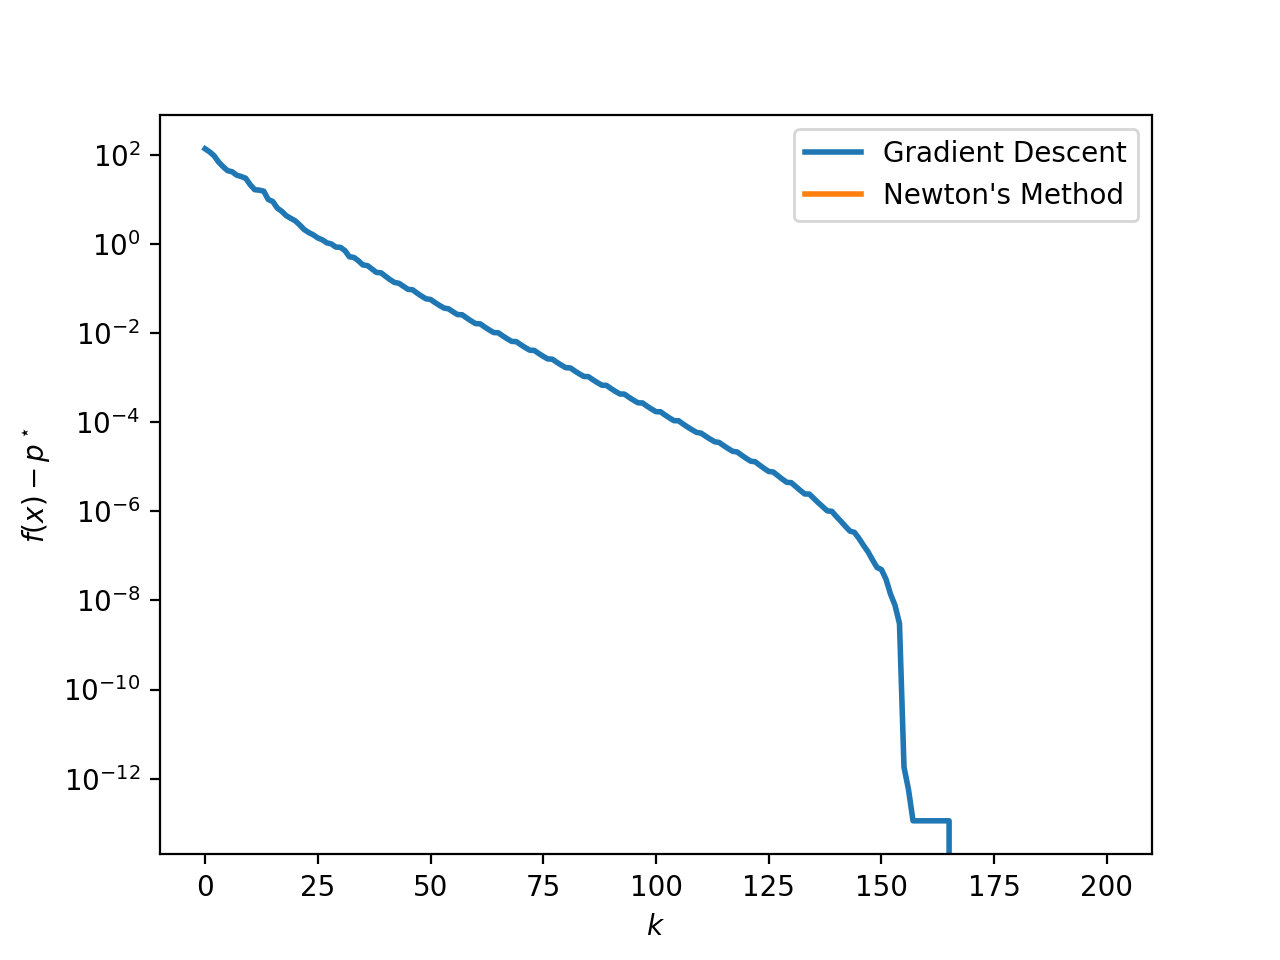

In [8]:
def gradient_descent(x, f, g, eps=1.0e-6, max_iters=200, alpha=0.3, beta=0.7):
    """
    Implements gradient descent to minimize function f. See B&V Algorithm 9.3.

    :param x: Starting point in domain of f.
    :param f: The function to be optimized. Returns scalar.
    :param g: The gradient function. Returns vector in R^n.
    :param eps: Tolerance for stopping.
    :param max_iters: Maximum number of iterations for stopping.
    :param alpha: Backtracking line search parameter.
    :param beta: Backtracking line search parameter.
    :return: Optimization path (i.e., array of x's). The last point is the optimal point.
    """

    path = [x.copy()]

    for iter in range(max_iters):
        # Compute gradient
        dx = -1.0 * g(x)

        # Stopping criterion
        print("...iter {}, f(x) = {}".format(iter, f(x)))
        if np.linalg.norm(dx) <= eps:
            break

        # Line search
        t = linesearch(f, g(x), x, dx, alpha, beta)

        # Update
        x += t * dx
        path.append(x.copy())

    return path


def newton(x, f, g, H, eps=1.0e-6, max_iters=200, alpha=0.3, beta=0.7):
    """
    Implements Newton's method to minimize function f. See B&V Algorithm 9.5.

    :param x: Starting point in domain of f.
    :param f: The function to be optimized. Returns scalar.
    :param g: The gradient function. Returns vector in R^n.
    :param H: The Hessian function. Returns matrix in R^{n \times n}.
    :param eps: Tolerance for stopping.
    :param max_iters: Maximum number of iterations for stopping.
    :param alpha: Backtracking line search parameter.
    :param beta: Backtracking line search parameter.
    :return: Optimization path (i.e., array of x's). The last point is the optimal point.
    """

    # Initialize optimization path
    path = [x.copy()]

    for iter in range(max_iters):
        # Compute Newton step and decrement
        dx = -1.0 * np.linalg.solve(H(x), g(x))
        lmd2 = -1.0 * np.dot(g(x).T, dx)

        # Stopping criterion
        print("...iter {}, f(x) = {}".format(iter, f(x)))
        if 0.5 * lmd2 <= eps:
            break

        # Line search
        t = linesearch(f, g(x), x, dx, alpha, beta)

        # Update
        x += t * dx
        path.append(x.copy())

    return path

# --- test -----------------------------------------------------------------------------------------------

# solve using gradient descent
gd_path = gradient_descent(np.zeros((n, 1)), objective, gradient)

# solve using newton's method
nm_path = newton(np.zeros((n, 1)), objective, gradient, hessian)

if objective(nm_path[-1]) < objective(gd_path[-1]):
    x_star = nm_path[-1]
else:
    x_star = gd_path[-1]
p_star = objective(x_star)

# plot
plt.figure()
plt.semilogy(range(len(gd_path)), [objective(x) - p_star for x in gd_path], lw=2)
plt.semilogy(range(len(nm_path)), [objective(x) - p_star for x in nm_path], lw=2)
plt.xlabel("$k$"); plt.ylabel(r"$f(x) - p^\star$")
plt.legend(["Gradient Descent", "Newton's Method"])
plt.show()

## (f) Implement gradient descent without line search

We will implement gradient descent with a fixed step size and decaying step size schedule. This is commonly done when evaluating the function (i.e., performing line search) is expensive. However, the cost is often more iterations of the optimisation algorithm. Pseudo-code for the algorithm is

---

**given** a starting point $x \in \textbf{dom} f$, a starting step size $t > 0$, and decay rate $0 < \gamma \leq 1$

**repeat**
1. $\Delta x_{nsd} := −\nabla f(x) / \|\nabla f(x)\|$.
2. if $x + t \Delta x_{nsd}$ feasible, then $x := x + t \Delta x_{nsd}$.
3. $t := \gamma t$.

**until** stopping criterion is satisfied.

---

...iter 0, f(x) = 935.9465337973112
...iter 1, f(x) = 928.1024274385284
...iter 2, f(x) = 922.5724938714399
...iter 3, f(x) = 918.1661087526868
...iter 4, f(x) = 914.3842697685961
...iter 5, f(x) = 911.0131778179616
...iter 6, f(x) = 907.9408348724552
...iter 7, f(x) = 905.1006167441487
...iter 8, f(x) = 902.448862406145
...iter 9, f(x) = 899.9548472968276
...iter 10, f(x) = 897.5958045019132
...iter 11, f(x) = 895.3541896826177
...iter 12, f(x) = 893.2160499456464
...iter 13, f(x) = 891.1699921014564
...iter 14, f(x) = 889.2065051083964
...iter 15, f(x) = 887.3175066681712
...iter 16, f(x) = 885.4960385635579
...iter 17, f(x) = 883.7360620543159
...iter 18, f(x) = 882.0323182267623
...iter 19, f(x) = 880.3802265729826
...iter 20, f(x) = 878.7758025483399
...iter 21, f(x) = 877.2155826763913
...iter 22, f(x) = 875.6965529263779
...iter 23, f(x) = 874.2160809483861
...iter 24, f(x) = 872.771854643414
...iter 25, f(x) = 871.361829147057
...iter 26, f(x) = 869.9841829260455
...iter 27, f(

...iter 236, f(x) = 801.0960927683561
...iter 237, f(x) = 801.0484323911087
...iter 238, f(x) = 801.0960927700326
...iter 239, f(x) = 801.0484323927366
...iter 240, f(x) = 801.0960927713768
...iter 241, f(x) = 801.0484323940366
...iter 242, f(x) = 801.0960927724533
...iter 243, f(x) = 801.048432395077
...iter 244, f(x) = 801.0960927733179
...iter 245, f(x) = 801.0484323959125
...iter 246, f(x) = 801.0960927740132
...iter 247, f(x) = 801.0484323965848
...iter 248, f(x) = 801.0960927745735
...iter 249, f(x) = 801.0484323971251
...iter 250, f(x) = 801.0960927750285
...iter 251, f(x) = 801.0484323975643
...iter 252, f(x) = 801.0960927753943
...iter 253, f(x) = 801.0484323979196
...iter 254, f(x) = 801.0960927756944
...iter 255, f(x) = 801.0484323982067
...iter 256, f(x) = 801.0960927759363
...iter 257, f(x) = 801.0484323984406
...iter 258, f(x) = 801.0960927761356
...iter 259, f(x) = 801.0484323986327
...iter 260, f(x) = 801.0960927762981
...iter 261, f(x) = 801.0484323987879
...iter 262, 

...iter 467, f(x) = 801.0484323995322
...iter 468, f(x) = 801.0960927770664
...iter 469, f(x) = 801.0484323995322
...iter 470, f(x) = 801.0960927770661
...iter 471, f(x) = 801.0484323995322
...iter 472, f(x) = 801.0960927770661
...iter 473, f(x) = 801.0484323995322
...iter 474, f(x) = 801.0960927770662
...iter 475, f(x) = 801.0484323995322
...iter 476, f(x) = 801.0960927770662
...iter 477, f(x) = 801.0484323995322
...iter 478, f(x) = 801.0960927770665
...iter 479, f(x) = 801.0484323995322
...iter 480, f(x) = 801.0960927770665
...iter 481, f(x) = 801.0484323995322
...iter 482, f(x) = 801.0960927770665
...iter 483, f(x) = 801.0484323995321
...iter 484, f(x) = 801.0960927770665
...iter 485, f(x) = 801.0484323995322
...iter 486, f(x) = 801.0960927770665
...iter 487, f(x) = 801.0484323995322
...iter 488, f(x) = 801.0960927770665
...iter 489, f(x) = 801.0484323995322
...iter 490, f(x) = 801.0960927770664
...iter 491, f(x) = 801.0484323995322
...iter 492, f(x) = 801.0960927770665
...iter 493,

...iter 208, f(x) = 801.0647951547347
...iter 209, f(x) = 801.0457208944165
...iter 210, f(x) = 801.0642798194558
...iter 211, f(x) = 801.0456029133396
...iter 212, f(x) = 801.0637813842877
...iter 213, f(x) = 801.045492936661
...iter 214, f(x) = 801.0632992428465
...iter 215, f(x) = 801.0453905912877
...iter 216, f(x) = 801.0628328119553
...iter 217, f(x) = 801.0452955194157
...iter 218, f(x) = 801.0623815307092
...iter 219, f(x) = 801.0452073779543
...iter 220, f(x) = 801.0619448595955
...iter 221, f(x) = 801.0451258379576
...iter 222, f(x) = 801.061522279626
...iter 223, f(x) = 801.0450505840988
...iter 224, f(x) = 801.0611132915161
...iter 225, f(x) = 801.0449813141357
...iter 226, f(x) = 801.0607174149139
...iter 227, f(x) = 801.0449177384196
...iter 228, f(x) = 801.0603341876188
...iter 229, f(x) = 801.0448595794036
...iter 230, f(x) = 801.059963164899
...iter 231, f(x) = 801.044806571181
...iter 232, f(x) = 801.0596039187598
...iter 233, f(x) = 801.0447584590328
...iter 234, f(x

...iter 436, f(x) = 801.0447121481602
...iter 437, f(x) = 801.0444862183272
...iter 438, f(x) = 801.0447067373561
...iter 439, f(x) = 801.044485334693
...iter 440, f(x) = 801.0447014960068
...iter 441, f(x) = 801.0444845291945
...iter 442, f(x) = 801.0446964183014
...iter 443, f(x) = 801.0444837978883
...iter 444, f(x) = 801.0446914986491
...iter 445, f(x) = 801.0444831370087
...iter 446, f(x) = 801.0446867316543
...iter 447, f(x) = 801.0444825429469
...iter 448, f(x) = 801.0446821121276
...iter 449, f(x) = 801.0444820122661
...iter 450, f(x) = 801.0446776350493
...iter 451, f(x) = 801.044481541667
...iter 452, f(x) = 801.0446732956157
...iter 453, f(x) = 801.0444811280114
...iter 454, f(x) = 801.044669089131
...iter 455, f(x) = 801.0444807682703
...iter 456, f(x) = 801.0446650112107
...iter 457, f(x) = 801.0444804596193
...iter 458, f(x) = 801.0446610572814
...iter 459, f(x) = 801.0444801991923
...iter 460, f(x) = 801.0446572238988
...iter 461, f(x) = 801.0444799847496
...iter 462, f(

<IPython.core.display.Javascript object>


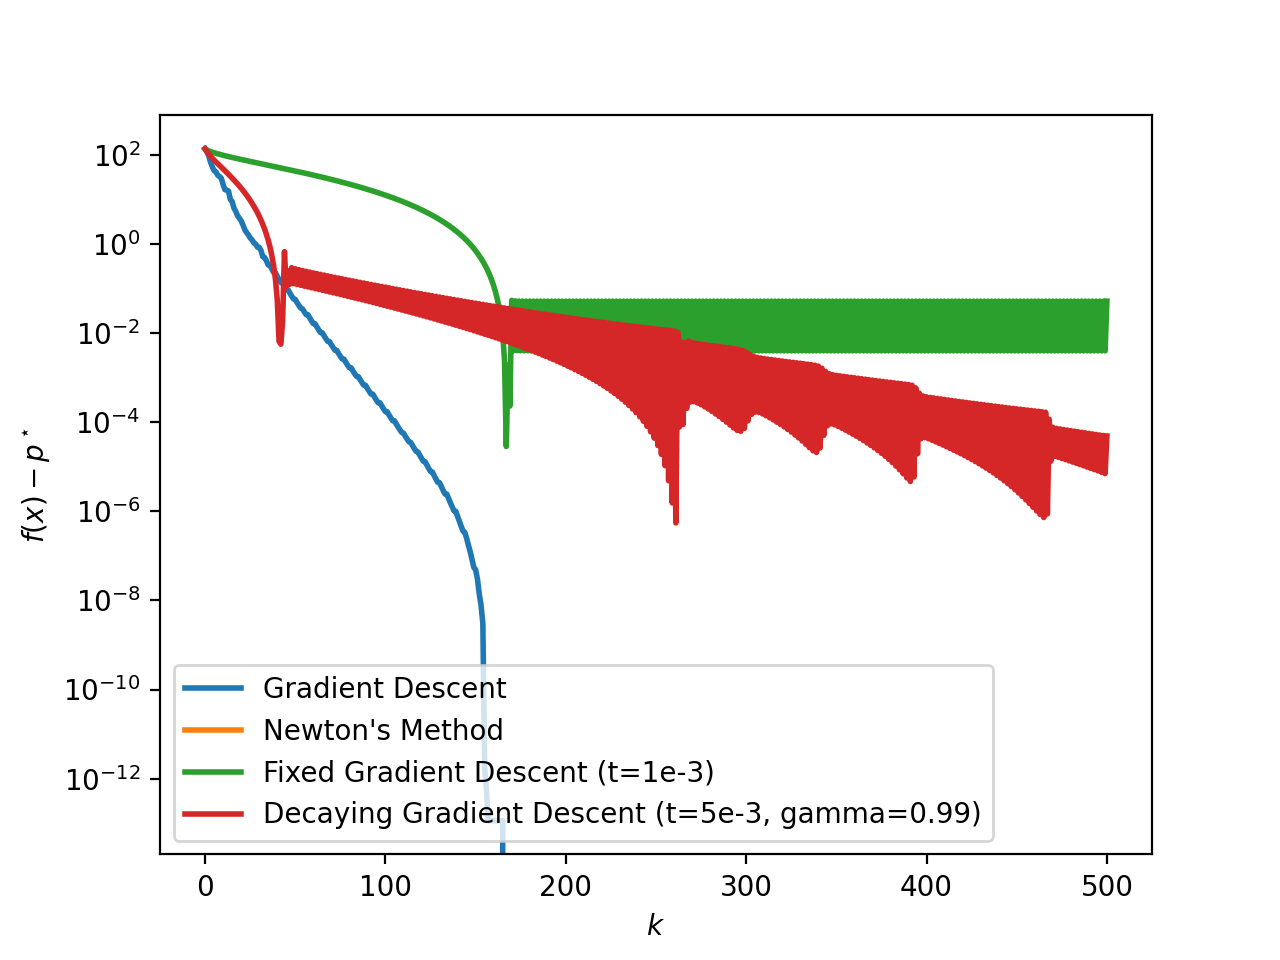

In [10]:
def gradient_descent_no_linesearch(x, f, g, eps=1.0e-6, max_iters=500, t=1.0e-3, gamma=1.0):
    """
    Implements gradient descent with fixed step size to minimize function f.

    :param x: Starting point in domain of f.
    :param f: The function to be optimized. Returns scalar.
    :param g: The gradient function. Returns vector in R^n.
    :param eps: Tolerance for stopping.
    :param max_iters: Maximum number of iterations for stopping.
    :param t: Initial step size parameter.
    :param gamma: Step size decay schedule (set to 1.0 for fixed step size).
    :return: Optimization path (i.e., array of x's). The last point is the optimal point.
    """

    path = [x.copy()]

    ###########################################################################
    # TODO: Implement gradient descent with step size schedule. You can use   #
    # the `gradient_descent` function above as an example. Don't forget to    #
    # ensure that x remains feasible. If x becomes infeasible then do not     #
    # take that step.                                                         #
    for iter in range(max_iters):
        # Compute gradient
        dx = -1.0 * g(x)
        
        # Stopping criterion
        print("...iter {}, f(x) = {}".format(iter, f(x)))
        if np.linalg.norm(dx) <= eps:
            break
            
        x_nsd = dx/np.linalg.norm(dx)
        
        if f(x + t*x_nsd) == np.inf:
            break
        
        # Update
        x += (t * x_nsd)
        
        t *= gamma
        path.append(x.copy())

            
    
    ###########################################################################    
    

    return path

# --- test -----------------------------------------------------------------------------------------------

# solve using gradient descent with fixed step size
gd_fixed = gradient_descent_no_linesearch(np.zeros((n, 1)), objective, gradient, t=1.0e-3)

# solve using gradient descent with decaying step size
gd_decay = gradient_descent_no_linesearch(np.zeros((n, 1)), objective, gradient, t=5.0e-3, gamma=0.99)

# plot
plt.figure()
plt.semilogy(range(len(gd_path)), [objective(x) - p_star for x in gd_path], lw=2)
plt.semilogy(range(len(nm_path)), [objective(x) - p_star for x in nm_path], lw=2)
plt.semilogy(range(len(gd_fixed)), [objective(x) - p_star for x in gd_fixed], lw=2)
plt.semilogy(range(len(gd_decay)), [objective(x) - p_star for x in gd_decay], lw=2)
plt.xlabel("$k$"); plt.ylabel(r"$f(x) - p^\star$")
plt.legend(["Gradient Descent", "Newton's Method", "Fixed Gradient Descent (t=1e-3)", "Decaying Gradient Descent (t=5e-3, gamma=0.99)"])
plt.show()

## (g) What can you say about the speed of convergence of Newton's method compared to gradient descent? What can you say about line search compared to no line search?

I think the no line search is a lot more faster than line search, since it is much faster for no line search to complete 500 interations compared to line search. Nevertheless, line search may be closer to optimal value as in less iterations, it can achieve less f(x) - p* value compared to no line search

# 2. Linear Programming

Write a Python script using `cvx` to solve the following linear over $x \in \mathbb{R}^4$:

$$
\begin{array}{ll}
    \text{minimize} & 8x_1 + 6x_2 + 5x_3 + 0x_4 \\
    \text{subject to} & x_1 + x_2 + x_3 + x_4 = 1 \\
    & x_1 - x_2 + x_3 - x_4 = 0 \\
    & x_1, x_2, x_3, x_4 \geq 0
\end{array}
$$

Include a printout of the optimal value and solution ($p^\star$ and $x^\star$).

In [527]:
n = 4
c = np.array([8, 6, 5, 0])
A = np.array([[1, 1, 1, 1], [1, -1, 1, -1]])
b = np.array([1, 0])

###########################################################################
# my solution
# create variables
x = cvx.Variable(4)
# create constraints
cons = [A@x == b,
       x >= 0]

# form objective
obj = cvx.Minimize(c@x)

# form problem.
p = cvx.Problem(obj, cons)

# solve problem
p.solve()
print(p.status)
###########################################################################

print("p^\\star is {}".format(p.value))
print("x^\\star is {}".format(x.value.transpose()))

optimal
p^\star is 2.5000000047504614
x^\star is [1.18300841e-09 2.00187873e-10 4.99999999e-01 5.00000000e-01]


# 3. Total Variation Denoising

In this question we investigate the problem of signal denoising.
Consider a signal $x \in \mathbb{R}^n$ corrupted by noise.
We measure the corrupted signal $x_{\text{corr}}$ and wish to recover a good estimate $\hat{x}$ of the original signal.
To do this we solve the total variation denoising problem

$$
    \text{minimize} \quad \|\hat{x} - x_{\text{corr}}\|_2^2 + \lambda \|D \hat{x}\|_1
$$

where $D$ is the discrete derivative operator.
Using the data supplied in `x_corr` below write a `cvx` program to solve the above optimization problem.

You should experiment with your code to find a "good" value for $\lambda$. Include a plot of the recovered signal.

<IPython.core.display.Javascript object>


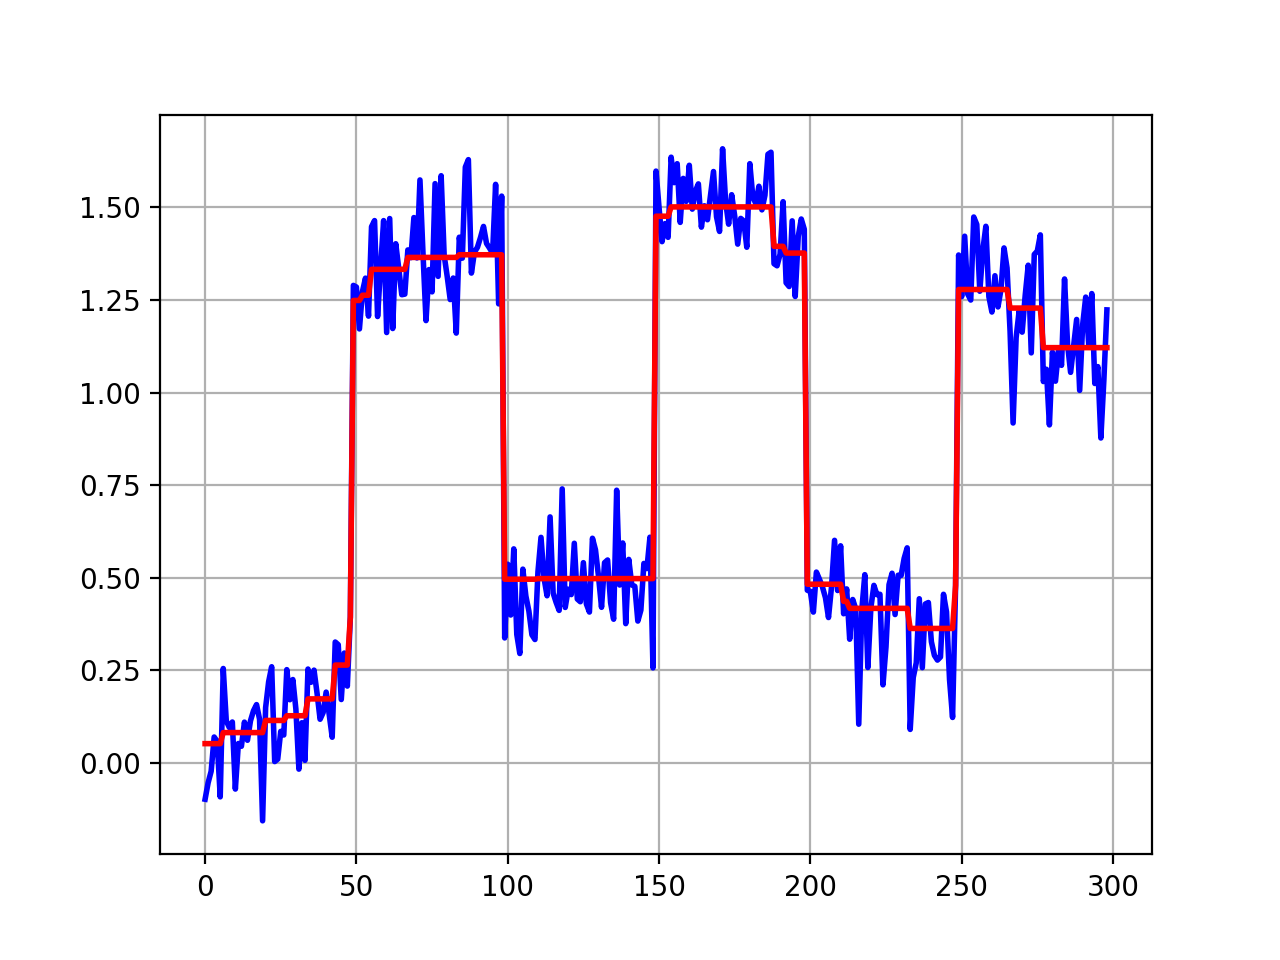

optimal
p^\star is 7.880628422578589
x^\star is [[0.05249207 0.05249207 0.05249207 0.05249207 0.05249207 0.05249207
  0.08231453 0.08231453 0.08231453 0.08231453 0.08231453 0.08231453
  0.08231453 0.08231453 0.08231453 0.08231454 0.08231454 0.08231454
  0.08231454 0.08231454 0.11506804 0.11506804 0.11506804 0.11506804
  0.11506804 0.11506804 0.11506804 0.12776656 0.12776656 0.12776656
  0.12776656 0.12776656 0.12776656 0.12776656 0.17323312 0.17323312
  0.17323312 0.17323312 0.17323312 0.17323312 0.17323312 0.17323312
  0.17323312 0.26450902 0.26450902 0.26450902 0.26450903 0.26450903
  0.39387898 1.24850976 1.24850976 1.24850976 1.26258971 1.26258971
  1.26258971 1.33245876 1.33245876 1.33245876 1.33245876 1.33245876
  1.33245876 1.33245876 1.33245876 1.33245876 1.33245876 1.33245876
  1.33245876 1.36463374 1.36463374 1.36463374 1.36463374 1.36463374
  1.36463374 1.36463374 1.36463374 1.36463374 1.36463374 1.36463374
  1.36463374 1.36463374 1.36463374 1.36463374 1.36463374 1.36463374


In [564]:
x_corr = np.array([[-0.0975398, -0.05312629, -0.02208009, 0.07036122, 0.05844751, -0.09111081,
    0.25524962, 0.11391867, 0.0960413,  0.11087175, -0.07009398, 0.05289032,
    0.04535016, 0.11058097, 0.06159582, 0.11416539, 0.14135736, 0.15779885,
    0.11841745, -0.15573929, 0.1497802, 0.21942491, 0.26002953, 0.00406207,
    0.01076279, 0.08560526, 0.0758106,  0.25218958, 0.17094868, 0.22549197,
    0.14582193, 0.04450351 -0.06080554, 0.10889565, 0.00731979, 0.25383178,
    0.21807304, 0.25086839, 0.18829612, 0.11829805, 0.13624649, 0.19156383,
    0.13209717, 0.06982474, 0.32671382, 0.31943926, 0.17156955, 0.29698227,
    0.20784119, 0.39387925, 1.28915111, 1.28466809, 1.17170899, 1.27276483,
    1.30876264, 1.20624095, 1.4475541,  1.46402195, 1.20518098, 1.33903493,
    1.46396276, 1.16194968, 1.46954723, 1.17276413, 1.40154012, 1.3344524,
    1.26395560, 1.26554295, 1.38484967, 1.36392024, 1.47217226, 1.36321748,
    1.57373381, 1.37651055, 1.19416729, 1.33185537, 1.27173017, 1.56374847,
    1.31351920, 1.58509611, 1.37037572, 1.31357229, 1.25089095, 1.30896004,
    1.16045129, 1.4191379,  1.36266027, 1.6084522,  1.62853032, 1.3224233,
    1.37852896, 1.39204502, 1.41821484, 1.4482654,  1.40243864, 1.38977182,
    1.37571206, 1.56182708, 1.23933557, 1.53008693, 0.33778563, 0.53671323,
    0.39959707, 0.57810608, 0.34714623, 0.29574822, 0.52339211, 0.45073105,
    0.40999754, 0.34623906, 0.33349269, 0.51698474, 0.60916496, 0.49911337,
    0.45151697, 0.66435914, 0.45909372, 0.43361937, 0.4120461,  0.73994126,
    0.42003412, 0.46914222, 0.45475553, 0.59319831, 0.44271781, 0.43542827,
    0.54085238, 0.4293042,  0.40759905, 0.60673875, 0.57559843, 0.50406625,
    0.42045591, 0.54069747, 0.54812155, 0.43266464, 0.3882286,  0.73634181,
    0.48057600, 0.59402863, 0.37636053, 0.54966699, 0.48076493, 0.47702163,
    0.38324708, 0.41276572, 0.5387545,  0.52499184, 0.60955938, 0.2569498,
    1.59757400, 1.49974750, 1.40716928, 1.45590647, 1.41881918, 1.63509243,
    1.56638179, 1.61757557, 1.45918297, 1.5779364,  1.51591186, 1.61326905,
    1.49489181, 1.54304499, 1.56310244, 1.44630669, 1.50400512, 1.46626777,
    1.53122419, 1.5964117,  1.47436147, 1.43470409, 1.65776344, 1.5155677,
    1.45429071, 1.53389094, 1.47690731, 1.40044678, 1.46996803, 1.46289985,
    1.39214378, 1.61761391, 1.52735972, 1.50968299, 1.55671309, 1.49293167,
    1.53236883, 1.64304662, 1.6484901,  1.34768638, 1.34205666, 1.37332403,
    1.5150243,  1.29612487, 1.28611079, 1.46331723, 1.25927328, 1.42103747,
    1.46826865, 1.44057849, 0.46655008, 0.46351578, 0.40746583, 0.51540203,
    0.49632221, 0.4754424,  0.4461718,  0.3927947,  0.47569079, 0.60111625,
    0.46577111, 0.58634933, 0.4030563,  0.47001092, 0.33429442, 0.44149961,
    0.41634793, 0.10497809, 0.41269741, 0.50849201, 0.25793693, 0.41901946,
    0.47958449, 0.45448622, 0.4556222,  0.21116683, 0.31353546, 0.48157662,
    0.51232681, 0.40093506, 0.50693641, 0.50623056, 0.55246491, 0.58091882,
    0.09088771, 0.23097229, 0.27061655, 0.44344447, 0.25751509, 0.42937313,
    0.43329958, 0.32736408, 0.29068132, 0.27797564, 0.28634859, 0.45557439,
    0.4079212,  0.22503599, 0.12318214, 0.47911303, 1.3711563,  1.25869232,
    1.42184876, 1.26588232, 1.2496218,  1.47368919, 1.45357969, 1.27337315,
    1.38442839, 1.44858353, 1.25867526, 1.21725032, 1.31520763, 1.23095494,
    1.27825279, 1.39025742, 1.33612252, 1.16553053, 0.91782687, 1.14797106,
    1.2204012,  1.16296689, 1.26227372, 1.34358803, 1.10705193, 1.37268357,
    1.38178853, 1.42554157, 1.02966171, 1.06281221, 0.91270071, 1.10881591,
    1.03056827, 1.11251789, 1.07339657, 1.30644577, 1.12965944, 1.05443219,
    1.12534765, 1.19720807, 1.00582764, 1.18393038, 1.25752049, 1.12823257,
    1.26705351, 1.02434442, 1.07000497, 0.87731374, 1.03442913, 1.22304696]]).T
n = len(x_corr)

plt.figure()
plt.plot(x_corr, linewidth=2, color='b')
###########################################################################
# my solution 
# create variable
x_est = cvx.Variable((n,1))

# create discrete derivative operator
D = np.zeros((n-1,n))
for i in range(n-1):
    D[i,i] = -1
    D[i,i+1] = 1    

# form objective
obj = cvx.Minimize(cvx.square(cvx.norm(x_est-x_corr, 2))+ 0.9 * cvx.norm(D@x_est,1))

# form problem
p = cvx.Problem(obj)

# solve problem
p.solve()
print(p.status)
# show results
print("p^\\star is {}".format(p.value))
print("x^\\star is {}".format(x_est.value.transpose()))

# plot x_est value with red color
plt.plot(x_est.value, linewidth=2, color='r')
###########################################################################

plt.grid()
plt.show()

Discussion for the $\lambda$ for the total variation denoising problem:

By experiments, $\lambda$ has been tried by a range of numbers, from 0 to 75. And 0.8 is determined to be the good value for $\lambda$. 

When $\lambda$ is set to be small, e.g. less than 0.1, the denoise effect seems to vanish, and the estimated x seems to follow the pattern of the noise and when $\lambda$ is 0, the estimated x is the same as the x_corr. Thus, if $\lambda$ is too small, it is not a good value. However, if the $\lambda$ is too large, the result tends to become a line. For instance, if $\lambda$ is set to be 75, the estimated x is just a line, which clearly shows it is not a good value. Thus, I belive the $\lambda$ should be between 0.5 to 4, where the denoise effect is neither too strong nor too weak, and we can see the estimated x seems like a reasonable signal with repeated pattern, rather than a noise. Therefore, my final good value for $\lambda$ is 0.8, but I think many values around 0.8 are also good values.

